# Online store advertising

## 1. Load dataset

In [314]:
import numpy as np
import pandas as pd

DF_ads = pd.read_csv("./dataset/3_2_advertising.csv")
# DF_ads


## 2. Analyze to data

use methods of data visualiaztion to deduce the most relation feature

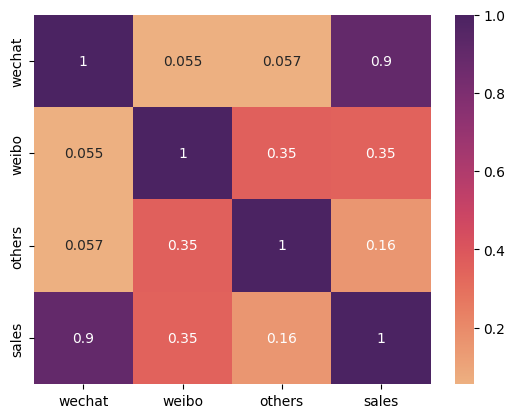

c:\Users\Administrator\.pyenv\pyenv-win\versions\3.10.11\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


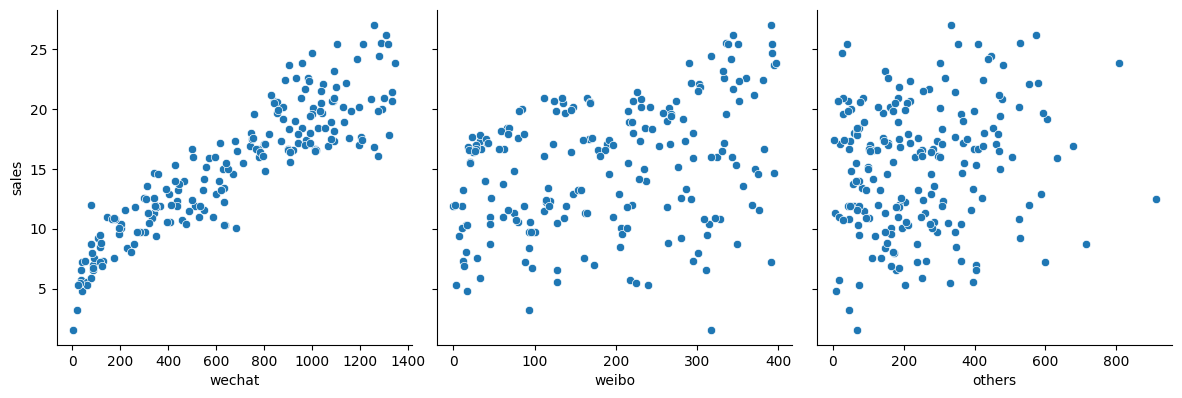

In [315]:
import matplotlib.pyplot as plt
import seaborn as sns  # A data-visualization tool of Seaborn of Statistics

"draw heatmap(热力图) to all label and features"
sns.heatmap(DF_ads.corr(), cmap=sns.cm._flare_lut, annot=True)
plt.show()

"use scatter to dispaly relation of 2(ads method and sale)"
sns.pairplot(DF_ads,
             x_vars=['wechat', 'weibo', 'others'],
             y_vars='sales',
             height=4, aspect=1, kind='scatter')
plt.show()


## 3. Clean and format of dataset

In [316]:
"as we know the 'wecaht' are most corelate feature to the label from upon seies"
X = np.array(DF_ads.wechat)
y = np.array(DF_ads.sales)
print("rank of X: ", X.ndim)
print("shape of X: ", X.shape)
# print(X)

"format to 2D tensor, so that ml model can received"
X = X.reshape((len(X), 1))
y = y.reshape((len(y), 1))
print("rank of X: ", X.ndim)
print("shape of X: ", X.shape)


rank of X:  1
shape of X:  (200,)
rank of X:  2
shape of X:  (200, 1)


Now we have 2 dimension, 1 for sample(样本) (just meaning of 1 row), 1 for feature(特征) (the data or this row)

Then we need to do is:
  1. split dataset into train-set and test-set   

  2. unifrom(归一化) to dataset like below function
   
      $$x^{'}=\frac{x-min(x)}{max(X)-min(X)}$$

(160, 1) --- 2
(160, 1) --- 2


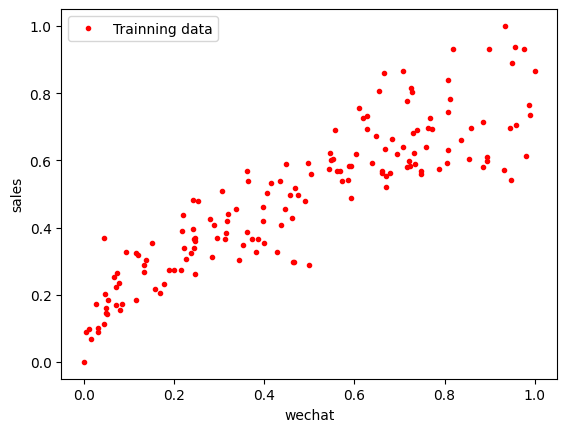

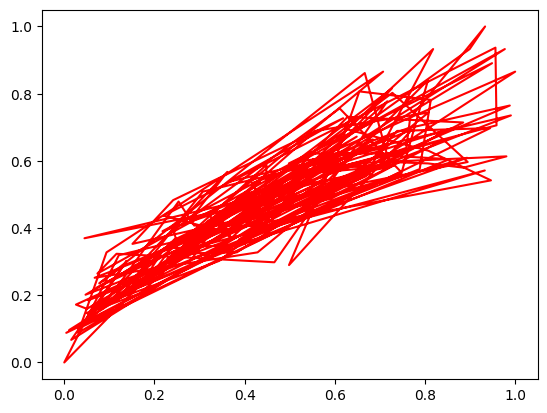

In [317]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0)

print(X_train.shape, '---', X_train.ndim)
print(y_train.shape, '---', y_train.ndim)


# def scaler(train :np.array, test: np.array): # data after split did not compatiable with array, maybe more than some dims
def scaler(train, test):
    "Use ourselves' unifrom method instead of MaxScaler of sklearn.preprocessing"
    # max and min value of train-set
    min = train.min(axis=0)
    max = train.max(axis=0)
    # the diff (区间值)
    gap = max - min

    """
    All data substruct by min value, and then divide by diff of range(区间)
    So it turn into 0~1 maybe more or less by test data
    """
    train -= min
    train /= gap
    test -= min
    test /= gap

    "return datas that have been compressed"
    return train, test


# function also equivalent to this, just equvalation above
# x_norm = (x_data -np.min(x_data)) / np(max(x_data)-np.min(x_data)).values

# NOTICE: cannot use diff(gap) by the max-min from `testset`!!! so will use the train-set's diff
X_train, X_test = scaler(X_train, X_test)
y_train, y_test = scaler(y_train, y_test)


"Display datas that have been precessor, to see the difference on above notes"
plt.plot(X_train, y_train, 'r.', label="Trainning data")
plt.xlabel("wechat")
plt.ylabel('sales')
plt.legend()  # display 图例-legend
plt.show()
# notice the `r` and `r.`
plt.plot(X_train, y_train, 'r', label="Trainning data")
plt.show()


## 4. Choose model

- It's 2 array of dataset, feature and label. (2 Nx1 tensor).
- So it's simple to find the `linear regression` as the model. (from the 2nd view of data above)

### 4.1 predict what the function is -- h(x)

$$ y' = wx +b $$
also:
$$ h(x) = wx + b $$

### 4.2 loss and loss-function

To deduce which is better from 2 models between `3x+5` and `100x+1` somehow...

1. If model prefic absolutely precise, it will 0 (of cost/loss).
2. If did not match, will bring some loss value.

The `loss funtion` $L (w, b)$ which will use to caculate the average loss.

Will be call as `cost function` (代价/成本函数) somewhere, and noted it as $J(\theta)$, And the $\theta$ is just `w and b`， $$J(\theta) = L(w,b)$$

> NOTICE: loss function is about `w` and `b`, but not about `x` and `y`, we should turn our minds about it. Why:

- As in the trainning, the x and y are fixed.
- So w and b turn into variable in loss-func.

#### 4.2.1 Loss function that used in `Regression`

- Mean Square Error, MSE (均方误差), called squre-loss (平方损失) or L2-loss function also.
- Mean Abolute Error, MAE, called L1-loss also.

#### 4.2.2 Loss function that used in `Classification`

- Corss-entropy loos (交叉熵损失) function, so called 均方差， 最小二乘法
- Hinge loss (多分类SVM损失)  function


### 4.2.3 Detail

1. For every  sample: Its *predict* and *label*'s diff is $(y-y')$, and $y'=wx+b$, so `loss value` is related with w and b.

2. If we promte the $(y-y')$, squre of it....(all are positve, non-negative), so called `square loss` of every sample:   $(y-y')^2$

3. Then, we need sumup are `square-loss` of all sample:
$$
    ( y（x(1)-y'(x(1) )^2 + 
    ( y（x(2)-y'(x(2) )^2 + 
    ... +
    ( y（x(n)-y'(x(n) )^2  
$$
And as sumup format is:


$$
\sum\limits_{(x,y)\in{D}} (y-h(x))^2
$$


In [318]:
def MSE_loss(X, y, weight, bias):
    """Ourselves' MSE loss function"""
    y_hat = weight * X + bias
    loss = y_hat - y  # every diff from prefit and label
    squre_loss_sum = np.sum(loss**2)
    # print(squre_loss_sum)
    # print(2*len(X))
    # cost = squre_loss_sum / 2*len(X)  # not equal when a/b * c and a/ (b*c): 5/5 *2 = 2, 5/(5*2) =1/2
    cost = squre_loss_sum / (2*len(X))  # average for divide  2n
    return cost


weight = 5
bias = 3
print(
    f"When `weight`=={weight}, `bais`=={bias}, the loss={ MSE_loss(X_train, y_train, weight, bias)}")
weight = 100
bias = 1
print(
    f"When `weight`=={weight}, `bais`=={bias}, the loss={ MSE_loss(X_train, y_train, weight, bias)}")


When `weight`==5, `bais`==3, the loss=12.796390970780058
When `weight`==100, `bais`==1, the loss=1577.9592615030556


## 5. Use `gradient descent` (梯度下降法)  to find best parameters

We have noticed that (5,3) is better than (100,1) of (w, b). 

But how to let bare machine to know which is best?
1. Every guess (parameters) should be better than previous one.
2. So the convex function(凸函数) and global lower point (全局最节点) were here.

The original *Mean Squre Error* function:
$$
MSE = L(w,b) = \frac{1}{2N} \sum\limits_{(x,y)\in{d}} (y-(wx+b))^2
$$

The `x` and `y` could be considered as constant fixed value... So `L` will only changed by the `w` and `b`.

And the function is a `quadratic function` (二次函数), we could just think it was a parabola with upward opening (开口向上的抛物线)


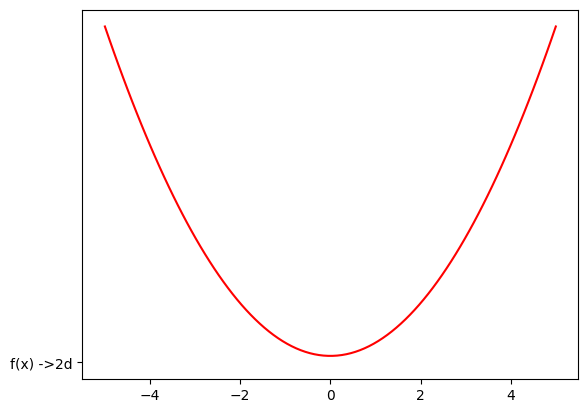

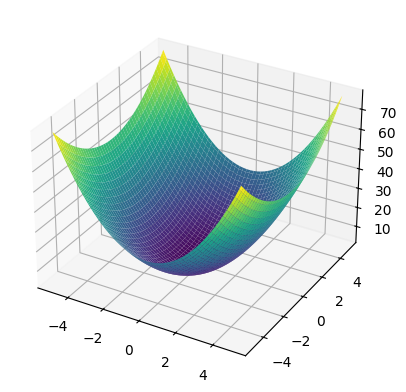

In [1]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np


def fx(x): return 2*x**2 + 1


x = np.linspace(-5, 5, 100)
Y = fx(x)
plt.plot(x, Y, 'r', "f(x) ->2d")
plt.show()


def hx(x, y): return 2*x**2 + y**2 + 3


y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)
Z = hx(X, Y)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')
plt.show()


### 5.1 The implementation of gradient descent

Just change the `w` and `b` to let the `L` (loss) more and more close to the lowest point.

Just a  dynmaic plan: go the lower loss point every step.

> Caculate the derivative (导数) !

The `gradient` means the vector of loss (current and previous), will `equal to` the `derivative` ?

- `Gradient ==  derivative` when there is only one `weight` in equation
- More than one weight the gradient will be `partial derivative` (偏导数)

So we get the gradient by derivation with loss curve/functon. And the `gradient` have serval properties:

1. Direction (the positive/negative of gradient)
2. Len/Size/Norm (the magnitude of the tangential tilt (切线倾斜的幅度) )


> So how to calculate the gradient in math:

~~Notice that will be `x times` but not `square-loss` in partial derviation~~

It's the derviation of `function of funtion` (复合函数)

$$
\begin{align}

Gradient &= \frac{\partial}{\partial W} L(W) \\
         &= \frac{\partial}{\partial W}  \frac{1}{2N} \sum \limits_{(x,y)\in D}  
            (y- h(x)^2)  \\
         &= \frac{\partial}{\partial W}  \frac{1}{2N} \sum \limits_{(x,y)\in D} 
            (y- (w*x)) * X 

\end {align}
$$

Could also be write as:
$$

Gradient = \frac{\partial}{\partial W}  \frac{1}{2N} \sum \limits_{i=1}^{N} 
            (y^{(i)}- (w*x^{(i)})) * X^{(i)}
$$

   ```python
   "A simple implementaion of gradient evaluator"
      y_hat = weight * X + bias  # assumed function model

      loss = y_hat - y  # get the loss, [a,b,c....] [dx]

   "X.T is (1,N) and dot the loss of (N,) will just be the dy/dx"
      # derivation of weight, len(X) are count of sample
      derivative_weight = X.T.dot(loss) / len(X)

      # derivation of bias, len(X) are count of sample
      derivative_bias = sum(loss) * 1 / len(X)
   ```


### 5.2 The learning rate (学习速率)

$\alpha$  as a weight of reduce formula(递推公式):

$$
W = W - \alpha * \frac{\partial}{\partial{W}} L(W)
$$

ae:

$$
W = W - \frac {\alpha} {N}  *
        \sum \limits_{i=1}^{N}
        (Y^{(i)} - (W * x^{(i)} )) * x^{(i)}
$$


code:
```py
weight = weight - alpha * derivative_weight # update the weight by alpha(learning reate)
bias = bias - alpha * derivative_bias
```

Current loss: 1.343795534906634


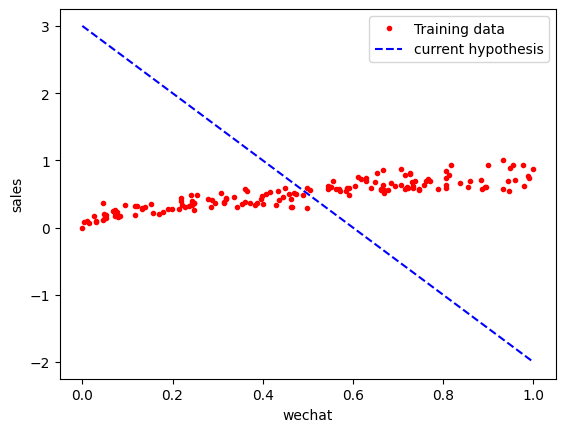

In [320]:
import numpy as np
"A gradient decent method"


def gradient_descent(X, y, w, b, lr, iter):
    """
    iter: iteration times
    lr: learning rate
    """
    l_history = np.zeros(iter)  # recorded the (l)oss array
    w_hishory = np.zeros(iter)  # recored the  (w)weight
    b_history = np.zeros(iter)  # recored the (b)ias

    for i in range(iter):
        y_hat = w*X + b
        loss = y_hat - y

        "cacualte the partial derivative of weight, bias"
        derivative_w = X.T.dot(loss) / len(X)
        derivative_b = sum(loss) * 1 / len(X)

        "use learning rate to implement gradient descent"
        w = w - lr * derivative_w
        b = b - lr * derivative_b

        "recored the loss and mapping weight and bias"
        l_history[i] = MSE_loss(X, y, w, b)
        w_hishory[i] = w
        b_history[i] = b

    return l_history, w_hishory, b_history


"Give it a  TRY!"
iterations = 100
alpha = 1  # initial learning_rate =1
weight = -5
bias = 3

print("Current loss:", MSE_loss(X_train, y_train, weight, bias))

# plot current function model
plt.plot(X_train, y_train, 'r.', label="Training data")

# plot current 假设函数
line_X = np. linspace(X_train.min(), X_train.max(), 500)  # X domain
"we predict the function is `w*x+b``"
line_y = [weight*xx + bias for xx in line_X]
plt.plot(line_X, line_y, 'b--', label='current hypothesis')
plt.xlabel('wechat')
plt.ylabel('sales')
plt.legend()
plt.show()


Noticed that the model is differecnet!!!

Because the initial `weight` and `bias` we choosed is redicous. Needing the gradient by the `learning rate` adjust.

In [2]:


def plot():
    loss_history, weight_history, bias_history = gradient_descent(
        X_train, y_train, weight, bias, alpha, iterations)

    # # "Plot the current model"
    # "Plot the loss cruve"
    # plt.plot(loss_history, 'g--', label='loss cruve')
    # plt.xlabel('Iterations')
    # plt.ylabel('Loss')
    # plt.legend()
    # plt.show()

    # # 绘制 last 的函数模型
    # plt.plot(X_train, y_train, 'r.', label='Training data')  # 显示训练数据
    # line_X = np.linspace(X_train.min(), X_train.max(), 500)  # X值域
    # line_y = [weight_history[-1]*xx + bias_history[-1]
    #           for xx in line_X]  # 假设函数
    # plt.plot(line_X, line_y, 'b--', label='Current hypothesis')  # 显示当前假设函数
    # plt.xlabel('wechat')
    # plt.ylabel('slaes')
    # plt.legend()
    # plt.show()

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

    ax1.plot(loss_history, 'g--', label='loss cruve')
    ax1.set_xlabel('Iterations')
    ax1.set_ylabel('Loss')
    ax1.set_title('Loss Curve')

    ax2.plot(X_train, y_train, 'r.', label='Training data')
    line_X = np.linspace(X_train.min(), X_train.max(), 500)  # X value range
    line_y = [weight_history[-1]*xx + bias_history[-1]
              for xx in line_X]  # Hypothesis function
    ax2.plot(line_X, line_y, 'b--', label='Current hypothesis')
    ax2.set_xlabel('WeChat')
    ax2.set_ylabel('Sales')
    ax2.legend()

    plt.subplots_adjust(wspace=0.5)
    plt.show()


iterations = 100
alpha = 1  # initial learning_rate =1
weight = -5
bias = 3

plot()

# alpha = 0.01
# plot()

alpha = 0.5
plot()

# alpha = 0.8
# plot()


"In differecnt iterations"
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
for ax, iter in [(ax1, 20), (ax2, 50), (ax3, 100)]:
    loss_history, weight_history, bias_history = gradient_descent(
        X_train, y_train, weight, bias, alpha, iter)

    ax.set_xlabel('intertions')
    ax.set_ylabel('loss')
    ax.plot(loss_history, 'b--', label='current  ')
plt.title("Loss decrement in different iterations by 0.5 of learning_rate")
plt.show()


NameError: name 'gradient_descent' is not defined

Current loss from train:  0.04944564702826533
The test set loss:  0.06336683025976599


e:\Local\Temp\ipykernel_26648\367027549.py:28: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  w_hishory[i] = w
e:\Local\Temp\ipykernel_26648\367027549.py:29: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  b_history[i] = b


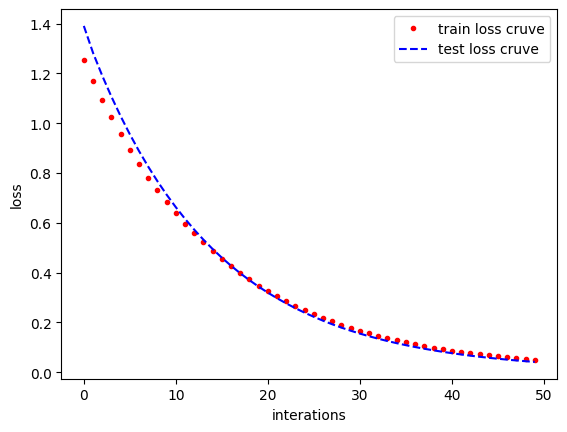

In [322]:

learning_rate = 0.5
iteration = 50


loss_history, weight_history, bias_history = gradient_descent(
    X_train, y_train, weight, bias, learning_rate, iteration)
print("Current loss from train: ", loss_history[-1])
print("The test set loss: ", MSE_loss(
    X_test, y_test, weight_history[-1], bias_history[-1]))

plt.plot(loss_history, 'r.', label="train loss cruve")

loss_history, weight_history, bias_history = gradient_descent(
    X_test, y_test, weight, bias, learning_rate, iteration)

plt.plot(loss_history, 'b--',  label="test loss cruve")

plt.xlabel("interations")
plt.ylabel("loss")
plt.legend()
plt.show()


## 5. The multi-dimensions funciton (multiple featrues)

we think the `bias` * `dummy`, just the $W_0 * X_0$ as a line of `bias`:
- $W_0$ ==> bias
- $X_0$ ==> dummy

So the new regression funciton will be:

$$
\begin{align}
y' &=h(x) = w^Tx \\
    &= W_0 X_0 +W_1 X_1 + W2_X2 + ....

\end{align}
$$

In [323]:
import numpy as np
X = np.array(DF_ads)  # contain all features
X = np.delete(X, [3], axis=1)  # delete the label (row 3)
y = np.array(DF_ads.sales)
print("tensor X's dimension/rank: ", X.ndim)
print("tensor X's shape: ", X.shape)
# print(X)

print(y.shape)
"Turn the y into tensor, and the -1 is meaning of len(y)"
y = y.reshape(-1, 1)
print(y.shape)


tensor X's dimension/rank:  2
tensor X's shape:  (200, 3)
(200,)
(200, 1)


Now we have sampe (200,1), and the feature (200,3)

And then the is **caculation** of `W` and `X`, like $[w_0,w_1,w_2,w_3]$

In [324]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0)

# for i in range(3):
#     y_hat = y_hat+ weight[i]*X[i]
#     y_hat = yaht+bias


def scaler(train, test):
    "Use ourselves' unifrom method instead of MaxScaler of sklearn.preprocessing"
    # max and min value of train-set
    min = train.min(axis=0)
    max = train.max(axis=0)
    # the diff (区间值)
    gap = max - min

    """
    All data substruct by min value, and then divide by diff of range(区间)
    So it turn into 0~1 maybe more or less by test data
    """
    train -= min
    train /= gap
    test -= min
    test /= gap

    "return datas that have been compressed"
    return train, test


X_train, X_test = scaler(X_train, X_test)
y_train, y_test = scaler(y_train, y_test)


def dummpy(X):
    "To avoid the loop above"
    x0_train = np.ones((len(X), 1))
    # print(x0_train.shape)
    X = np.append(x0_train, X, axis=1)
    # print(X_train.shape)
    # print(X_train) # one col of 1 in front
    return X


X_train = dummpy(X_train)
X_test = dummpy(X_test)


# multiple features ver. `loss function`` (MSE)
def loss_function(X, y, W):
    y_hat = X.dot(W.T)  # Xi * Wi
    diff = y_hat.reshape(len(y_hat), 1) - y
    cost = np.sum(diff**2) / (2*len(X))  # the MSE
    return cost


# multiple features ver. `gradient descent`
def gradient_descent(X, y, W, lr, iter):
    l_history = np.zeros(iter)
    w_hishory = np.zeros((iter, len(W)))

    for i in range(iter):
        # t tensor and caculate the diff/loss
        y_hat = X.dot(W)
        loss = y_hat.reshape(len(y_hat), 1) - y

        "cacualte the partial derivative of weight, bias"
        derivative_W = X.T.dot(loss) / (2*len(X))
        derivative_W = derivative_W.reshape(len(derivative_W))

        "use learning rate to implement gradient descent"
        W = W - lr * derivative_W

        "recored the loss and mapping weight"
        l_history[i] = loss_function(X, y, W)
        w_hishory[i] = W

    return l_history, w_hishory


def linear_regression(X, y, weight, alpha, iterations):
    loss_history, weight_history = gradient_descent(
        X, y, weight, alpha, iterations)

    print("------The finnal loss: ", loss_history[-1])
    y_pred = X.dot(weight_history[-1])  # use last weight
    training_acc = 100 - np.mean(np.abs(y_pred-y))*100
    print("------linear_regression trainning accuracy rate: ", training_acc)

    return loss_history, weight_history


iterations = 800
alpha = 0.03
# the weight vector, weight[0] will be the original bias, other will be dummpy
weight = np.array([2.7, 1, 1, 1])
print("Current loos is: ", loss_function(X_train, y_train, weight))

# tranning
loss_history, weight_history = linear_regression(
    X_train, y_train, weight, alpha, iterations)

print("Weight history: ", weight_history[0:2])
print("Loss history", loss_history[0:2])

min_index = loss_history.argmin()
print(min_index)
print(">>>> min Weight: ", weight_history[min_index])
print(">>>> min Loss: ", loss_history[min_index])

# print(we)
print("---- THe predict loss: ", loss_function(
    X_test, y_test, weight_history[min_index]))


Current loos is:  5.8949303759027645
------The finnal loss:  0.008935933275337874
------linear_regression trainning accuracy rate:  80.53366628482772
Weight history:  [[2.64878855 0.97492633 0.97525526 0.98549897]
 [2.59875329 0.95044967 0.95108812 0.97132994]]
Loss history [5.62648183 5.37031844]
799
>>>> min Weight:  [0.26505824 0.29509798 0.053265   0.27132842]
>>>> min Loss:  0.008935933275337874
---- THe predict loss:  0.014551748441171719


### Usage

Now we could use these data of `min_weight` as the fixed value, into the predict function....

The question in tutorial is:
- In the future of one week. Use the some money (hypothesis 250$, 50$, 50$), to buy `ads` for my shop
- it's the `wechat`, `weibo`, `others`
- And how many sales value will be return? by this trained model 


In [325]:
import numpy as np
from sklearn.model_selection import train_test_split

X = np.array(DF_ads)  # contain all features
X = np.delete(X, [3], axis=1)  # delete the label (row 3)
y = np.array(DF_ads.sales)
X_train_origin, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0)


X_plan = np.array([250, 50, 50], dtype=float)

"Normalize/Scaler the plan data by the trainning data"
X_train, x_plan = scaler(X_train_origin, X_plan)
# X_plan = dummpy(X_plan) # now X_plan is not a 2 dims tensor
X_plan = np.append([1], X_plan)

print(X_plan.shape)
print(X_train.shape)
# print(X_plan)
# print(X_train[0:2], '\n', X_plan)

"Use the trained weight"
y_plan = np.dot(weight_history[min_index], X_plan)
print(y_plan)

"And it need to reverse scale, to get the true predict value"
y_train_max, y_train_min = y_train.max(), y_train.min()
print(y_train_max, y_train_min)
y_value = y_plan * y_train_max + y_train_min

print("===> The finnal sales value that predict by model: ", y_value, " kilo $")


(4,)
(160, 3)
0.3370098600831596
27.0 3.2
===> The finnal sales value that predict by model:  12.299266222245308  kilo $


# Conclusion

1. Gather,Collect  and Load data
2. Preprocesses datatset
3. Choose model
    - hypothesis $h(x) = wx+b$ or $h(x) = w_0 +w_1x$    ($w_0$ as the bias) 
    - write as $h(x) = \theta_0 + \theta_1 X$ somewhere...
4. Loss function:
    - and use the gradient descent to minmize the L(w,b) or  $J(\theta_0, \theta_1)$
$$
MSE = L(W,b) = J(\theta_0, \theta_1) = \frac{1}{N} \sum_{ (X,y)\in{D}}  (Y-h(X))^2
$$


5. Adjust the gradient's initial `weight`, `learning rate` (alpha), `iterations`

6. Use the test dataset/ use the question X_input to get the output by the weight has been trained by model


# Home works

####  练习一

**在这一课中，我们花费了一些力气自己从头构造了一个线性回归模型，并没有借助Sklearn库的线性回归函数。这里请大家用Sklearn库的线性回归函数完成同样的任务。怎么做呢？同学们回头看看第1课1.2.3节中的“用Google Colab开发第一个机器学习程序”的加州房价预测问题就会找到答案。**

（提示：学完本课内容之后，面对线性回归问题，有两个选择，要么自己构建模型，要么直接调用机器学习函数库里现成的模型，然后用fit方法训练机器，确定参数。）


#### 练习二

**在Sklearn库中，除了前面介绍过的Linear Regression线性回归算法之外，还有Ridge Regression（岭回归）和Lasso Regression（套索回归）这两种变体。请大家尝试参考Sklearn在线文档，找到这两种线性回归算法的说明文档，并把它们应用于本课的数据集。**

>Ridge Regression和Lasso Regression与普通的线性回归在细节上有何不同？下一课中会简单地介绍。
